In [ ]:
#Bu versiyonda Pclass kategorik oalrak ayarlandı

In [1]:
#kütüphaneleri yükle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Veri dosyasını yükle
df_train=pd.read_csv("train.csv") #kaggle dosya yolalrını değiştirmeyi unutmayın
df_test=pd.read_csv("test.csv")

In [3]:
#Veri ön işleme ve EDA
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#veriseti hakkında bilgi
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#eksik veri kontrolü
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [7]:
#veri ön işleme işlemleri yapılacağı için test ve train birleştirilir
df=pd.concat([df_train,df_test],ignore_index=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [8]:
#satır sütun sayısı
df_train.shape,df_test.shape,df.shape #ilk 891 i train, son 418 i test

((891, 12), (418, 11), (1309, 12))

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
#numeric özellikler
numeric_columns=df.select_dtypes(include=['number'])
numeric_columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,NaN,0,0,8.0500
1305,1306,NaN,1,39.0,0,0,108.9000
1306,1307,NaN,3,38.5,0,0,7.2500
1307,1308,NaN,3,NaN,0,0,8.0500


In [11]:
# Her çalışmada anlamlı çıkacak diye bir kural
numeric_columns.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


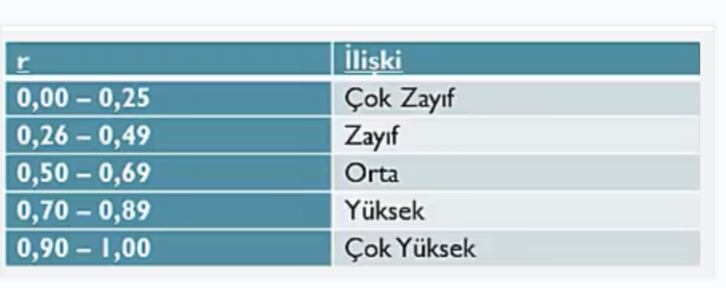

In [14]:
#Pclass kategoriye çevir
#df['Pclass']=df['Pclass'].astype('category')

In [16]:
#df['Pclass'].value_counts()

Pclass
3    709
1    323
2    277
Name: count, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

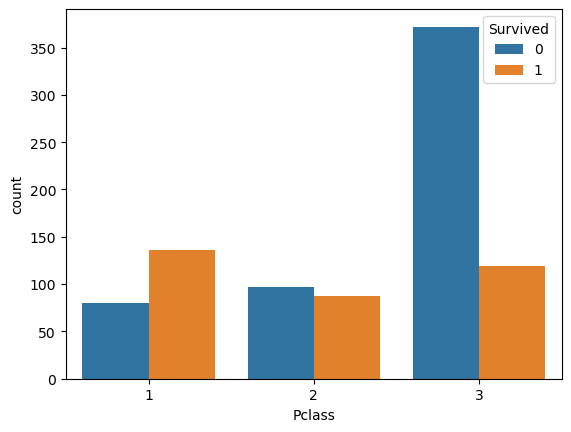

In [13]:
sns.countplot(x="Pclass", hue="Survived",data=df_train)

<Axes: xlabel='Survived', ylabel='count'>

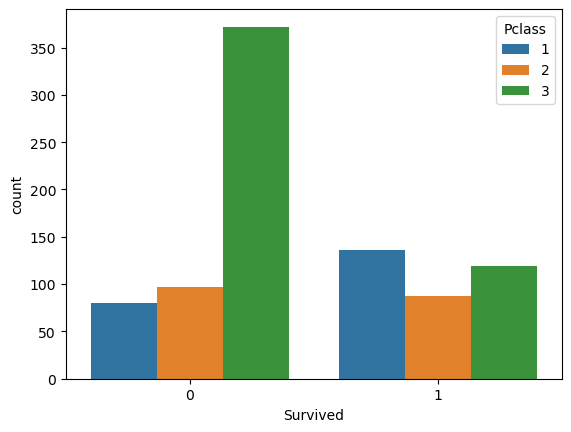

In [14]:
sns.countplot(x="Survived", hue="Pclass",data=df_train)

In [15]:
#Name sütunu
df['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [16]:
#Unvanları alalım
df['Title']=df['Name'].str.extract('([A-Za-z]+)\.')

In [17]:
#hangi unvanlar var
df['Title'].value_counts()

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [18]:
#Fransızca veya diğer dillerdeki ünvanları uygn şekilde çevirdik
df['Title']=df['Title'].replace(['Ms','Mlle'],'Miss')
df['Title']=df['Title'].replace(['Mme','Countess','Lady','Dona'],'Mrs')
df['Title']=df['Title'].replace(['Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer'],'Mr')

In [19]:
df['Title'].value_counts()

Title
Mr        783
Miss      264
Mrs       201
Master     61
Name: count, dtype: int64

In [20]:
#Embarked ekiks veiryi doldur
#en çok tekrar eden değeri kullan
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True) #df['Embarked'].mode()[0] birden fazla mod olabilir o yüzden ilkini al
df['Embarked'].isnull().sum()

0

In [21]:
df['Age'].isnull().sum()

263

In [22]:
#Yaş değerlerini doldur
df['Age'].fillna(df.groupby('Title')['Age'].transform('mean'),inplace=True) # unvanların yaş ortalamalarına göre eksik yaşları doldur
df['Age'].isnull().sum()

0

In [23]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          0
Title             0
dtype: int64

In [24]:
# Bilet ücreti
df['Fare'].mean()

33.29547928134557

In [25]:
df['Fare'].median()

14.4542

In [26]:
df['Fare'].fillna(df['Fare'].median(),inplace=True)
#df['Fare'].fillna(df['Fare'].mean(),inplace=True)

In [27]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
Title             0
dtype: int64

In [28]:
#ÖZellikler ve hedef değişkenlerini belirle
y=df['Survived']
X=df.drop(['Survived','PassengerId','Name', 'Ticket','Cabin'],axis=1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,male,22.0,1,0,7.2500,S,Mr
1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,female,26.0,0,0,7.9250,S,Miss
3,1,female,35.0,1,0,53.1000,S,Mrs
4,3,male,35.0,0,0,8.0500,S,Mr


In [29]:
y

0       0.0
1       1.0
2       1.0
3       1.0
4       0.0
       ... 
1304    NaN
1305    NaN
1306    NaN
1307    NaN
1308    NaN
Name: Survived, Length: 1309, dtype: float64

In [30]:
#Kategorik verileri sayısal verilere çevirir
#One Hot Encoding
X=pd.get_dummies(X,drop_first=True) #Feature Engineering özellik mühendisliği
#Pclass aslında sayısal bir veri değil önce dtype objeye çevireceksiniz sonra dummies yapacaksınız

In [31]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,3,22.000000,1,0,7.2500,True,False,True,False,True,False
1,1,38.000000,1,0,71.2833,False,False,False,False,False,True
2,3,26.000000,0,0,7.9250,False,False,True,True,False,False
3,1,35.000000,1,0,53.1000,False,False,True,False,False,True
4,3,35.000000,0,0,8.0500,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,32.811056,0,0,8.0500,True,False,True,False,True,False
1305,1,39.000000,0,0,108.9000,False,False,False,False,False,True
1306,3,38.500000,0,0,7.2500,True,False,True,False,True,False
1307,3,32.811056,0,0,8.0500,True,False,True,False,True,False


In [32]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [33]:
#Train ve testi aşağıdaki gibi ayırıyoruz
X_train=X[:891] #Train veri setinde ilk 891
X_test=X[891:]
y_train=y[:891]
y_test=y[891:]

In [34]:
#Tahminlerin gerçek değerleri yraışmalarda bizden gizlenir
y_test

891    NaN
892    NaN
893    NaN
894    NaN
895    NaN
        ..
1304   NaN
1305   NaN
1306   NaN
1307   NaN
1308   NaN
Name: Survived, Length: 418, dtype: float64

In [35]:
#all_class.py dosyası aynı klasörde bulunmalı
from all_class import all_classification_models #kendi oluşturduğum py dosyası ve fonksiyonlar

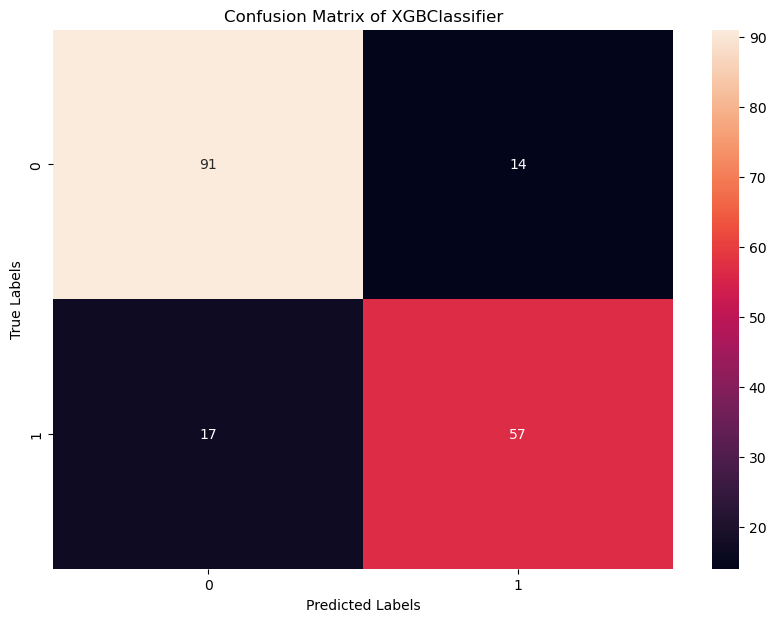

,Model,Accuracy
7,XGBClassifier,0.826816
5,RandomForestClassifier,0.815642
6,LogisticRegression,0.810056
4,DecisionTreeClassifier,0.793296
1,BernoulliNB,0.787709
0,GaussianNB,0.776536
2,KNeighborsClassifier,0.720670
3,SVC,0.653631


In [36]:
all_classification_models(X_train,y_train)

In [37]:
'''#en iyi modeli seçip tüm eğitim setiyle eğitiyoruz
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)# Testi kaggle üzerinden yapacağımız için artık veri setini bölmeden elimizdeki tüm veri setini gönderiyoruz.
y_pred=rfc.predict(X_test)
y_pred'''

'#en iyi modeli seçip tüm eğitim setiyle eğitiyoruz\nfrom sklearn.ensemble import RandomForestClassifier\nrfc=RandomForestClassifier()\nrfc.fit(X_train,y_train)# Testi kaggle üzerinden yapacağımız için artık veri setini bölmeden elimizdeki tüm veri setini gönderiyoruz.\ny_pred=rfc.predict(X_test)\ny_pred'

In [39]:
#en yi modeli seç tüm veri setiyle eğit ve hiperparametreyi ayarla
# RFC için GridSearchCV ile arama yapma
#Modelde hiperparametre ayarlaması
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Grid arama modeli oluşturma
rf_clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
grid_search.best_params_
y_pred = grid_search.predict(X_test)

In [42]:
#XGB Classsifier için hiperparamtre ayarları
from xgboost import XGBClassifier
# Denenecek hiperparametre değerleri
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300]
}

# Grid arama modeli oluşturma
xgb_clf = XGBClassifier(random_state=42)
grid_search = GridSearchCV(xgb_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
grid_search.best_params_
y_pred = grid_search.predict(X_test)

In [43]:
submission = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': y_pred.astype(int)})
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [44]:
submission.to_csv('submission_xgb.csv', index=False) #data frame i csv dosyası oalrak kaydediyor
#Bu dosyayı kagle da yarışmada submit ediyoruz ve skorumuzu görüyoruz.
#Dosya klasörümüzde

#ama sonuca çok da bir yararı olmadı
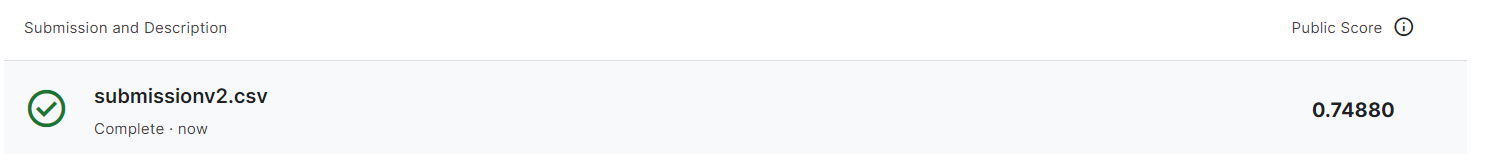

In [ ]:
# Farklı stratejiler Deneysel

In [49]:
#Pclass a göre hayatta kalma
df.groupby('Pclass')['Survived'].value_counts(normalize=True)

Pclass  Survived
1       1.0         0.629630
        0.0         0.370370
2       0.0         0.527174
        1.0         0.472826
3       0.0         0.757637
        1.0         0.242363
Name: proportion, dtype: float64

In [52]:
df.groupby('Sex')['Survived'].value_counts(normalize=True)

Sex     Survived
female  1.0         0.742038
        0.0         0.257962
male    0.0         0.811092
        1.0         0.188908
Name: proportion, dtype: float64

#Yaş için 
female=74
male=19

In [50]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,32.811056,0,0,A.5. 3236,8.0500,NaN,S,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,Mrs
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",male,32.811056,0,0,359309,8.0500,NaN,S,Mr


In [53]:
df['Pclass'].isnull().sum()

0

In [54]:
df['Pclass']=df['Pclass'].replace([1,2,3],[62,47,24])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,24,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,62,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,24,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,62,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,24,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,24,"Spector, Mr. Woolf",male,32.811056,0,0,A.5. 3236,8.0500,NaN,S,Mr
1305,1306,NaN,62,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,Mrs
1306,1307,NaN,24,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
1307,1308,NaN,24,"Ware, Mr. Frederick",male,32.811056,0,0,359309,8.0500,NaN,S,Mr


In [55]:
df['Sex']=df['Sex'].replace(['male','female'],[74,19])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,24,"Braund, Mr. Owen Harris",74,22.000000,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,62,"Cumings, Mrs. John Bradley (Florence Briggs Th...",19,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,24,"Heikkinen, Miss. Laina",19,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,62,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",19,35.000000,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,24,"Allen, Mr. William Henry",74,35.000000,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,24,"Spector, Mr. Woolf",74,32.811056,0,0,A.5. 3236,8.0500,NaN,S,Mr
1305,1306,NaN,62,"Oliva y Ocana, Dona. Fermina",19,39.000000,0,0,PC 17758,108.9000,C105,C,Mrs
1306,1307,NaN,24,"Saether, Mr. Simon Sivertsen",74,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
1307,1308,NaN,24,"Ware, Mr. Frederick",74,32.811056,0,0,359309,8.0500,NaN,S,Mr


In [56]:
df.groupby('Title')['Survived'].value_counts(normalize=True)

Title   Survived
Master  1.0         0.575000
        0.0         0.425000
Miss    1.0         0.702703
        0.0         0.297297
Mr      0.0         0.838290
        1.0         0.161710
Mrs     1.0         0.796875
        0.0         0.203125
Name: proportion, dtype: float64

In [60]:
df['Title']=df['Title'].replace(['Master','Miss','Mr','Mrs'],[57,70,16,79])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,24,"Braund, Mr. Owen Harris",74,22.000000,1,0,A/5 21171,7.2500,NaN,S,16
1,2,1.0,62,"Cumings, Mrs. John Bradley (Florence Briggs Th...",19,38.000000,1,0,PC 17599,71.2833,C85,C,79
2,3,1.0,24,"Heikkinen, Miss. Laina",19,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,70
3,4,1.0,62,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",19,35.000000,1,0,113803,53.1000,C123,S,79
4,5,0.0,24,"Allen, Mr. William Henry",74,35.000000,0,0,373450,8.0500,NaN,S,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,24,"Spector, Mr. Woolf",74,32.811056,0,0,A.5. 3236,8.0500,NaN,S,16
1305,1306,NaN,62,"Oliva y Ocana, Dona. Fermina",19,39.000000,0,0,PC 17758,108.9000,C105,C,79
1306,1307,NaN,24,"Saether, Mr. Simon Sivertsen",74,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,16
1307,1308,NaN,24,"Ware, Mr. Frederick",74,32.811056,0,0,359309,8.0500,NaN,S,16


In [61]:
#ÖZellikler ve hedef değişkenlerini belirle
y=df['Survived']
X=df.drop(['Survived','PassengerId','Name', 'Ticket','Cabin'],axis=1)

In [62]:
X=pd.get_dummies(X,drop_first=True)
X_train=X[:891] #Train veri setinde ilk 891
X_test=X[891:]
y_train=y[:891]
y_test=y[891:]

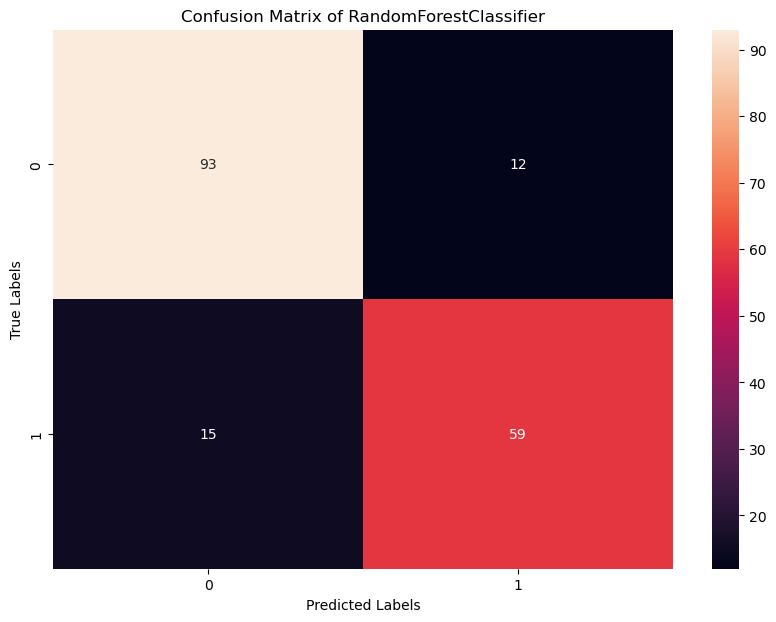

,Model,Accuracy
5,RandomForestClassifier,0.849162
6,LogisticRegression,0.804469
7,XGBClassifier,0.804469
0,GaussianNB,0.793296
3,SVC,0.793296
2,KNeighborsClassifier,0.776536
4,DecisionTreeClassifier,0.776536
1,BernoulliNB,0.681564


In [63]:
all_classification_models(X_train,y_train)

In [64]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)# Testi kaggle üzerinden yapacağımız için artık veri setini bölmeden elimizdeki tüm veri setini gönderiyoruz.
y_pred=rfc.predict(X_test)
y_pred

array([0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 0.

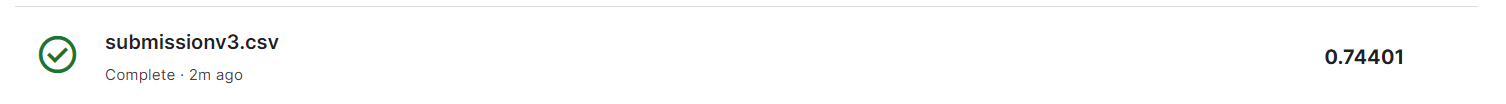

In [69]:
#import logisticregression()
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train,y_train)
y_pred=lg.predict(X_test)

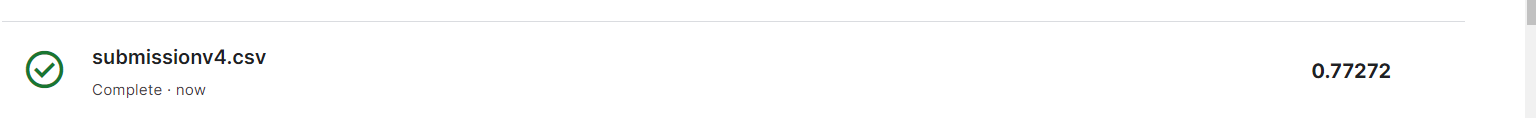

In [46]:
submission = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': y_pred.astype(int)})
submission
submission.to_csv('submissionv4.csv', index=False) #data frame i csv dosyası oalrak kaydediyor
#Bu dosyayı kagle da yarışmada submit ediyoruz ve skorumuzu görüyoruz.
#Dosya klasörümüzde
#standart scaler ı da kullanacaktım